# Download Dataset from Kaggle

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d harikrishnareddyb/used-car-price-predictions

 93% 16.0M/17.2M [00:01<00:00, 18.4MB/s]
100% 17.2M/17.2M [00:01<00:00, 11.5MB/s]


In [ ]:
! unzip used-car-price-predictions.zip

Archive:  used-car-price-predictions.zip
  inflating: true_car_listings.csv   


#Intialization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

# Load Dataset

In [ ]:
df = pd.read_csv('/content/true_car_listings.csv')

#Data Discovery

In [ ]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [ ]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [ ]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [ ]:
manu_count_label = np.unique(df.Make, return_counts=True)
manu_count_label

(array(['AM', 'Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ferrari',
        'Fisker', 'Ford', 'Freightliner', 'GMC', 'Genesis', 'Geo',
        'HUMMER', 'Honda', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar',
        'Jeep', 'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus',
        'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
        'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
        'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object),
 array([    19,  11049,     44,    149,  12618,  32415,    367,  12491,
         15047, 102268,  16357,  34368,   1782,    345,     19, 110432,
            11,  29008,    141,      2,    949,  50193,  35837,  12258,
            76,   2200,  40373,  28636,    121,   4096,  20641,   7120,
            42,   4375,   

In [ ]:
print("Number of Manufacturer: " + str(len(np.unique(df.Make))))

Number of Manufacturer: 58


Text(0.5, 1.0, 'Manufacterer vs Number of Cars')

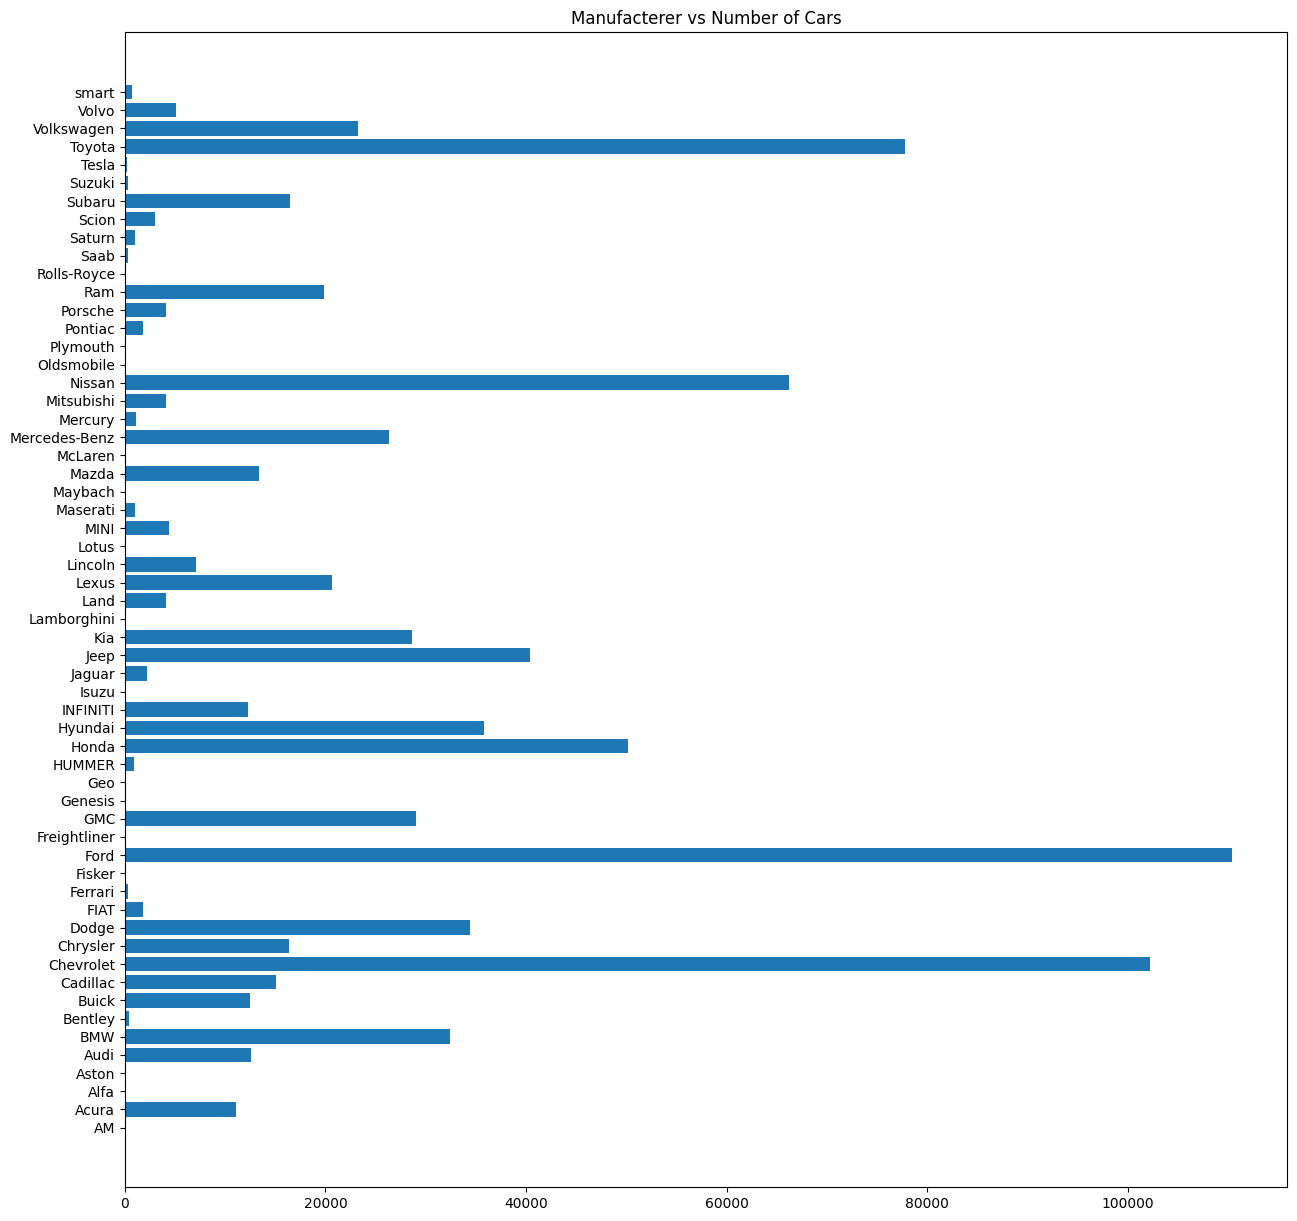

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 15))

y_value = manu_count_label[0]
x_value = manu_count_label[1]

ax.barh(y_value, x_value, align='center')
ax.set_title('Manufacterer vs Number of Cars')

## EDA : sweetviz

In [ ]:
! pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 3.6 MB/s 


In [ ]:
import sweetviz as sv 

analyze_report = sv.analyze(df)
analyze_report.show_html('used_car.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report used_car.html was generated.



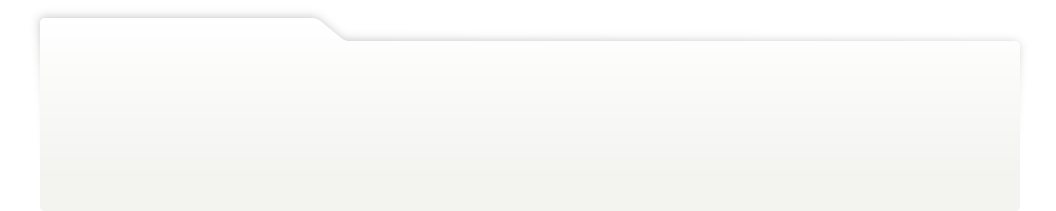
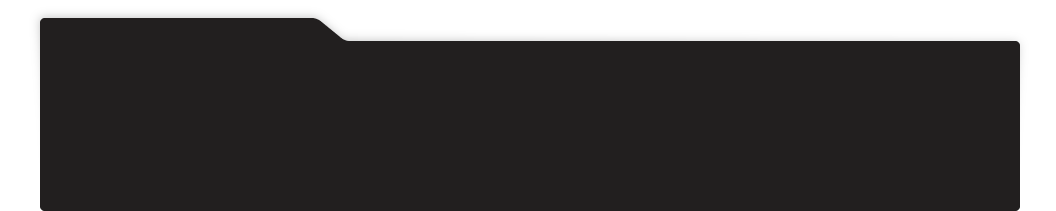
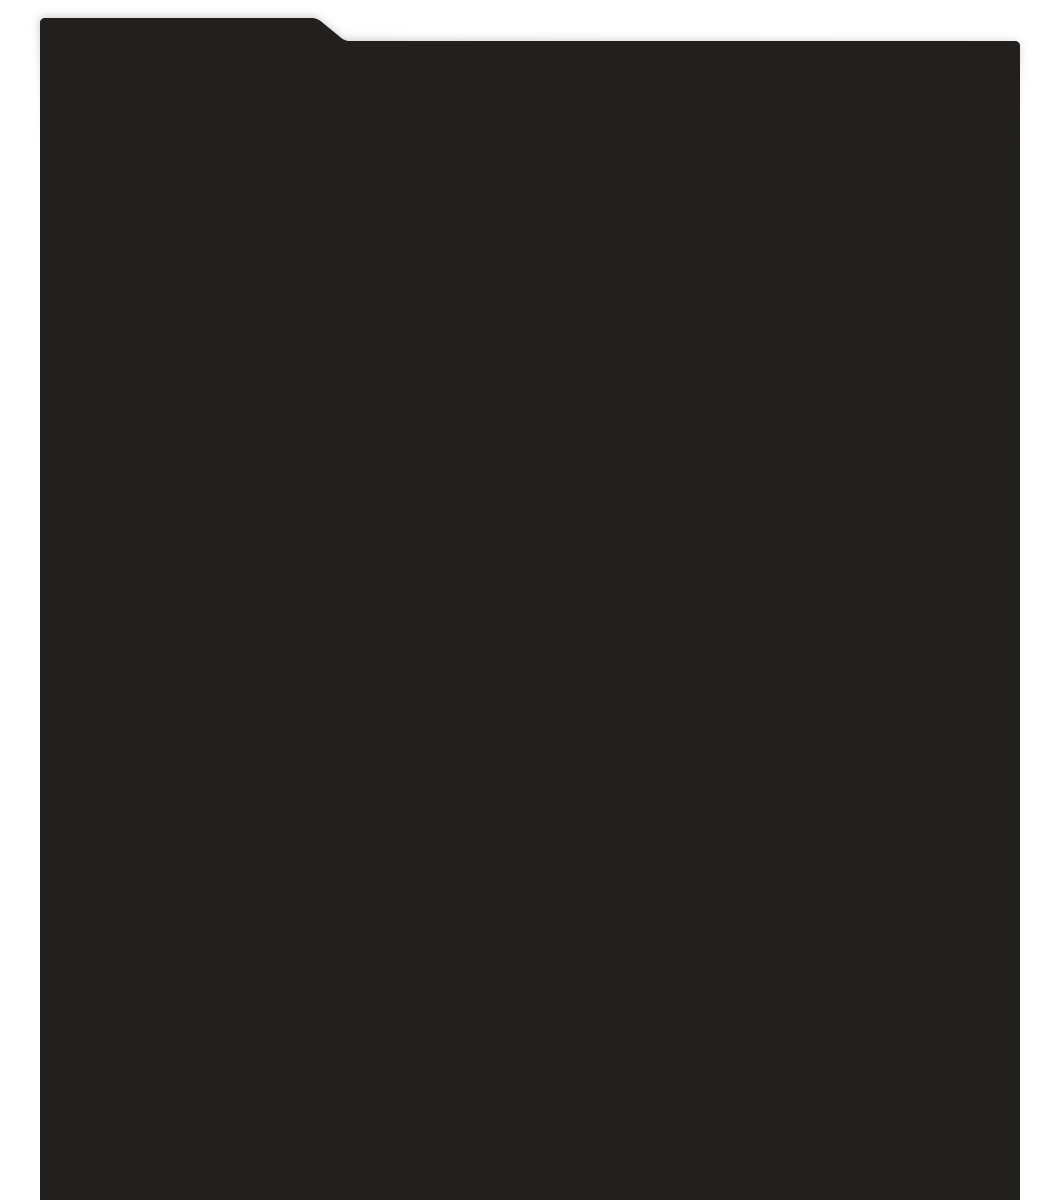
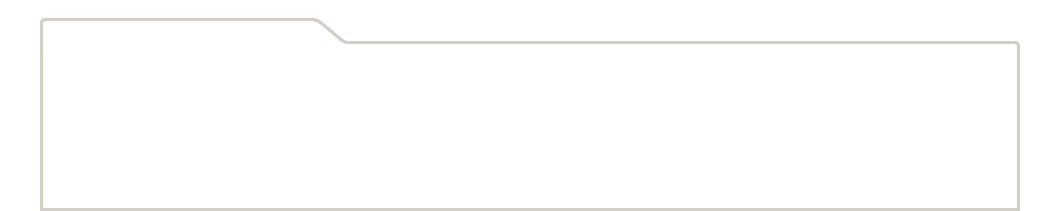
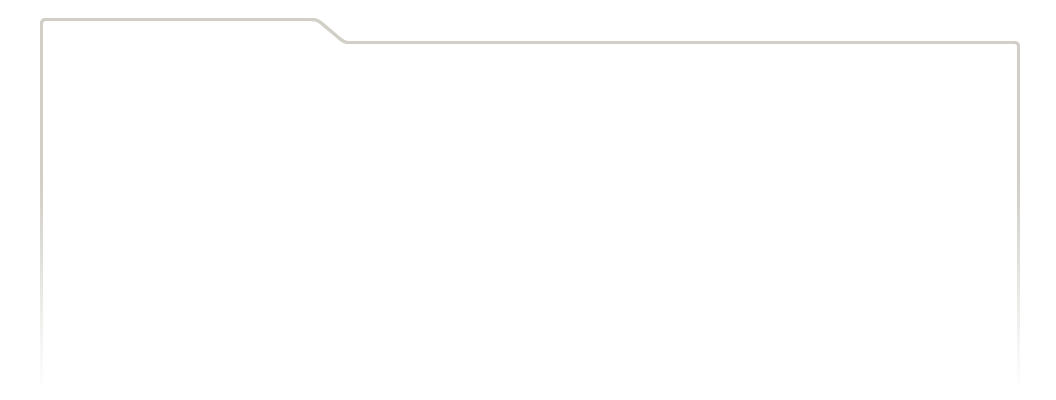
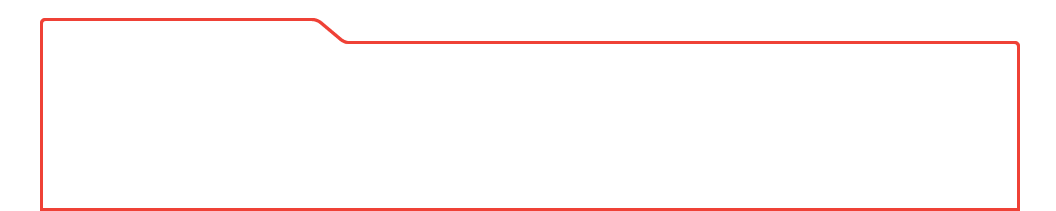
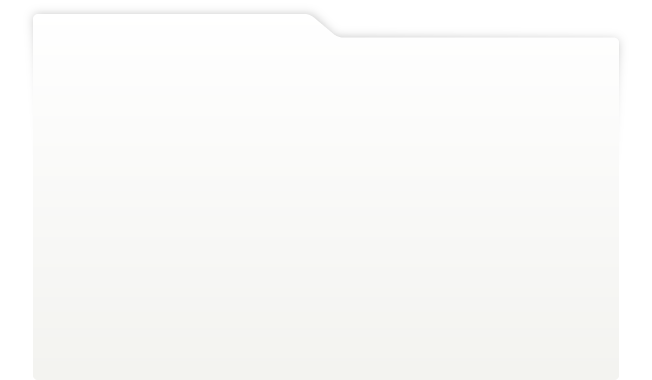
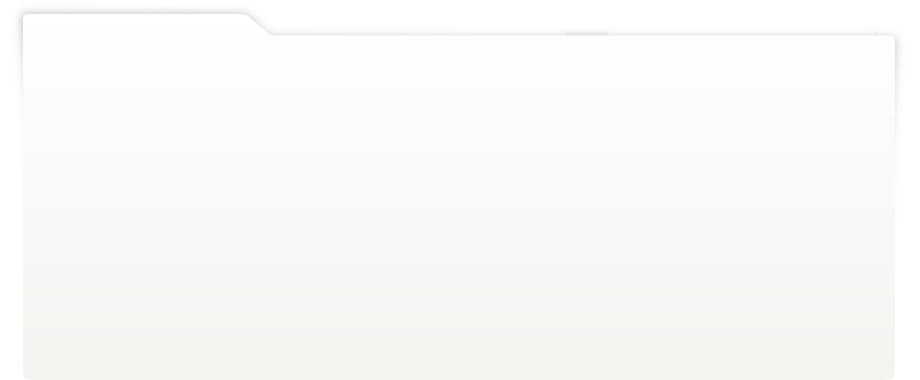
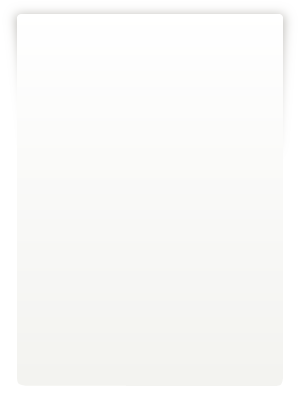
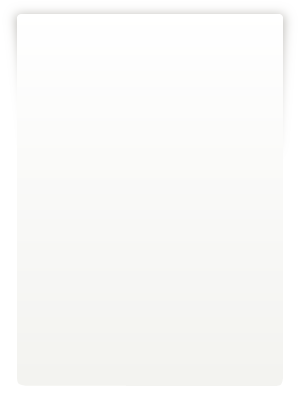
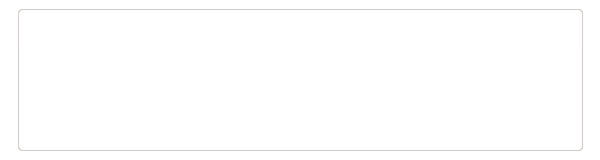
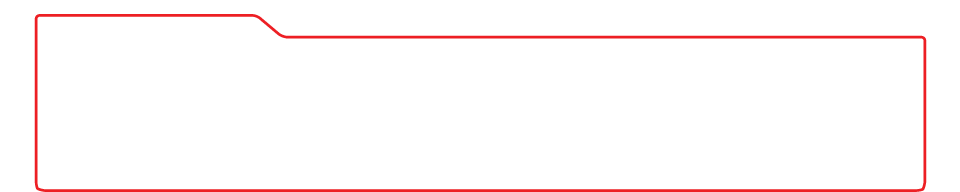
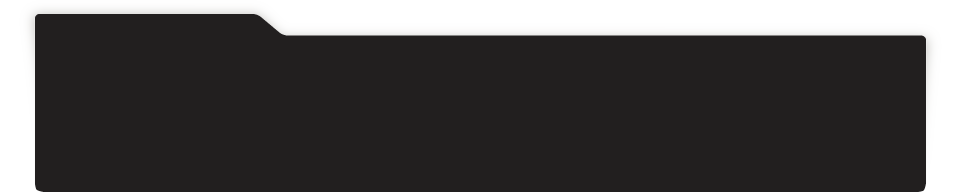
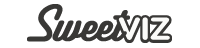
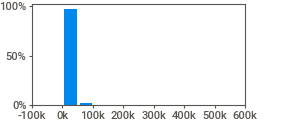
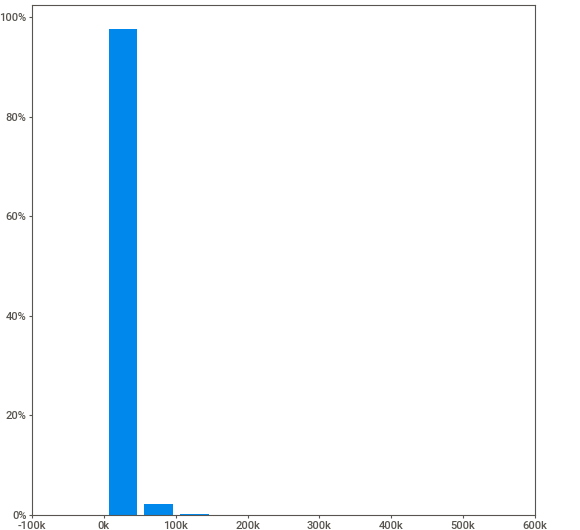
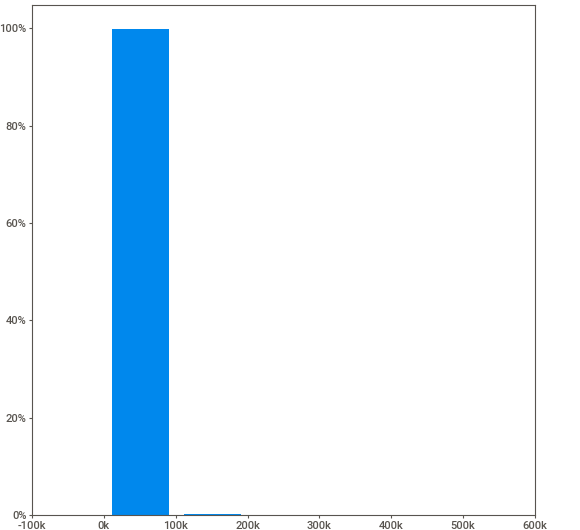
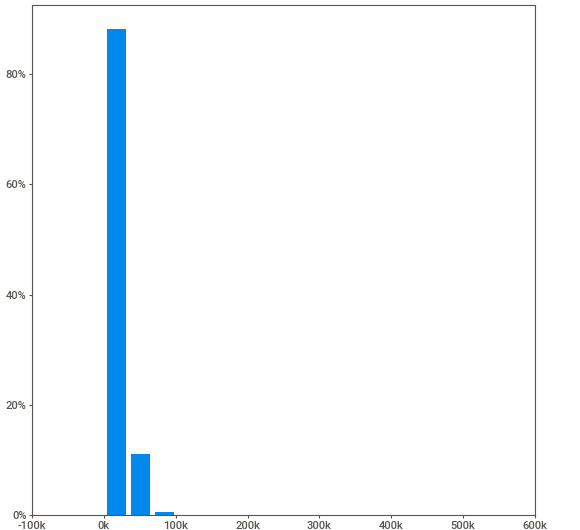
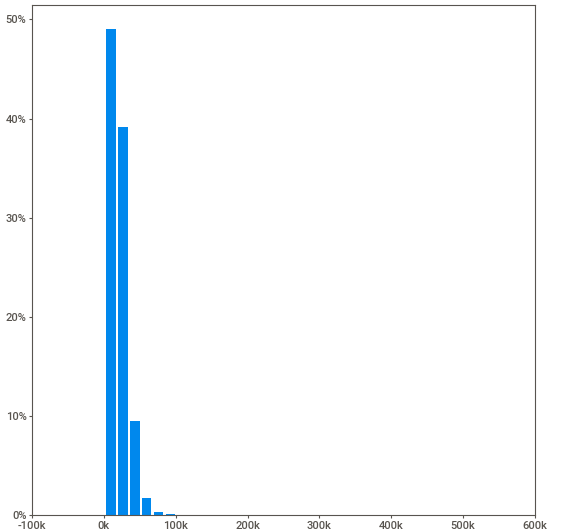
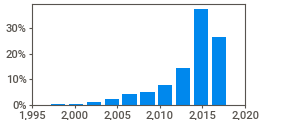
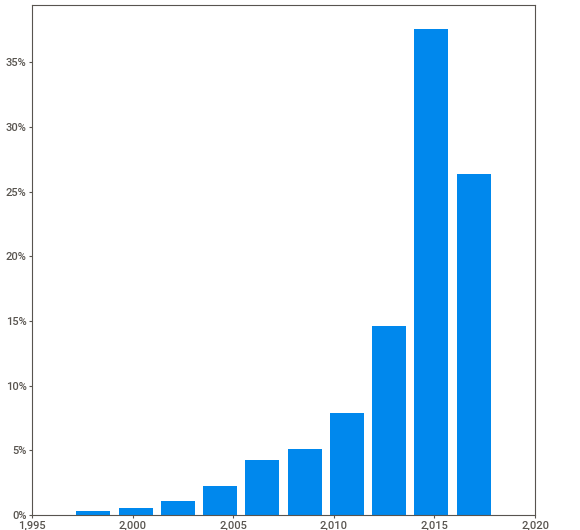
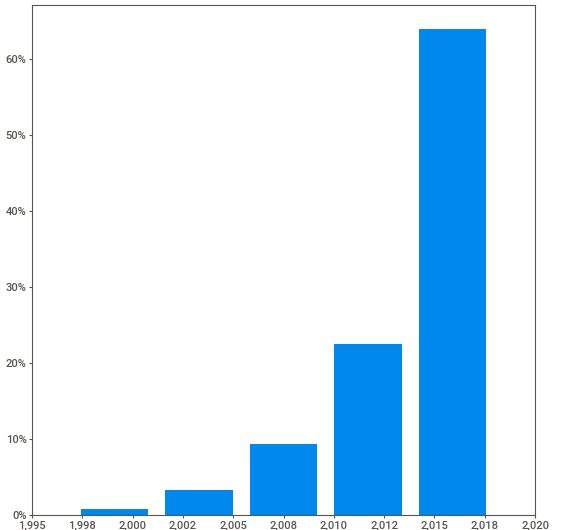
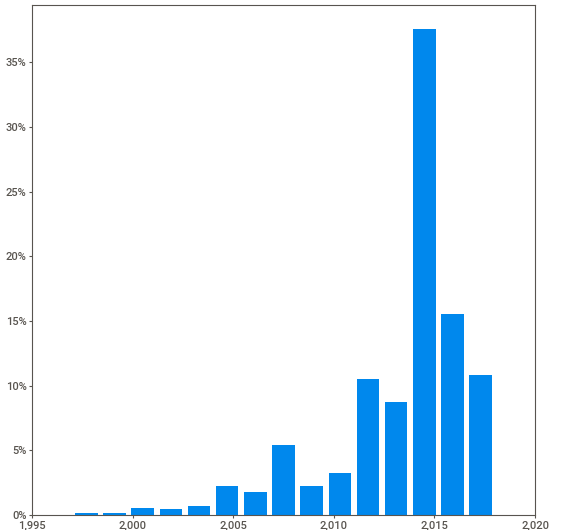
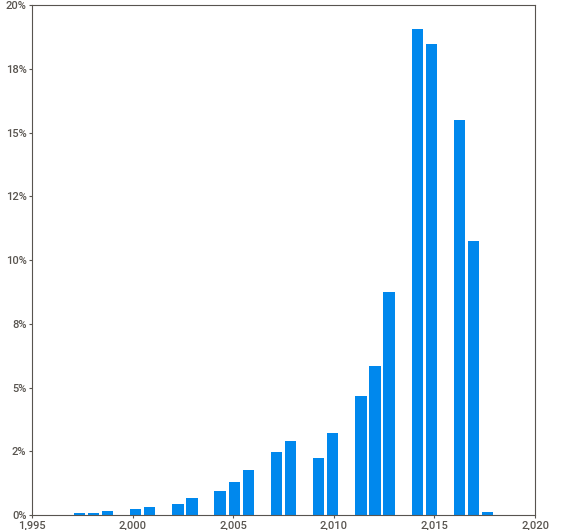
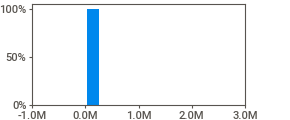
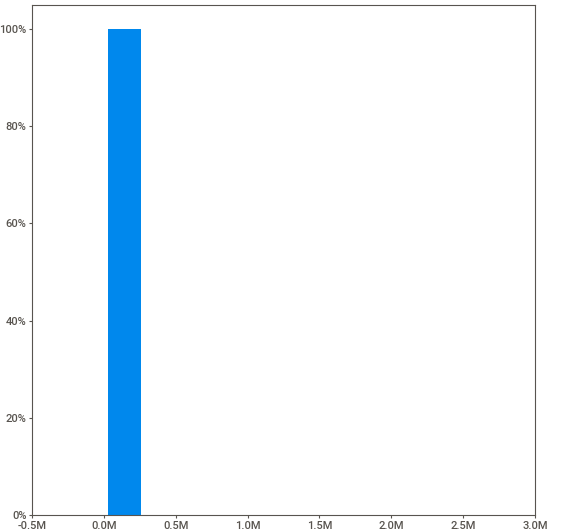
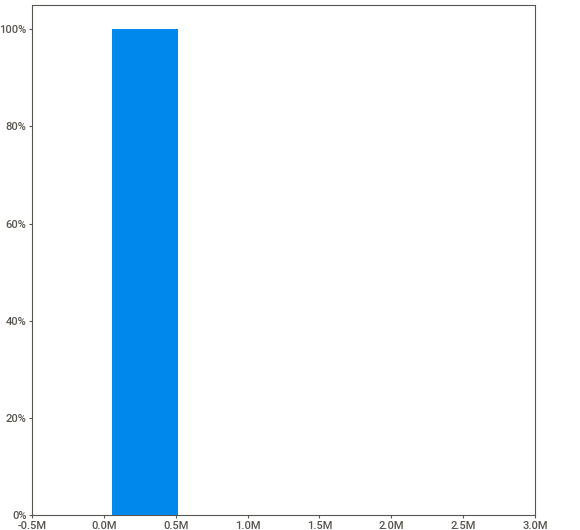
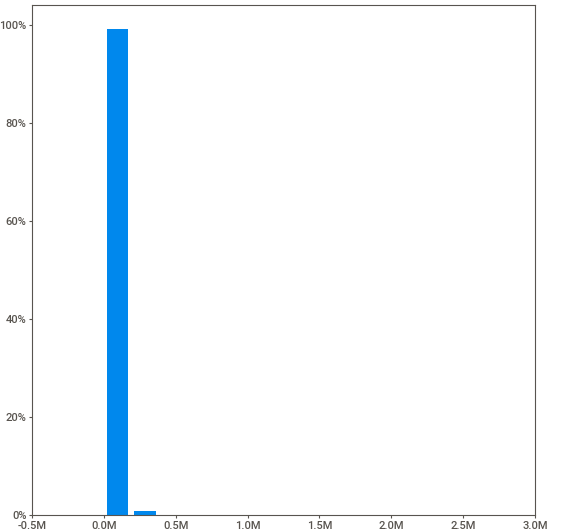
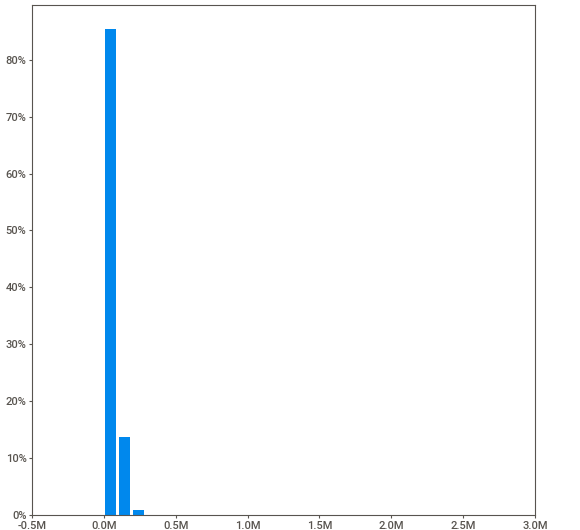
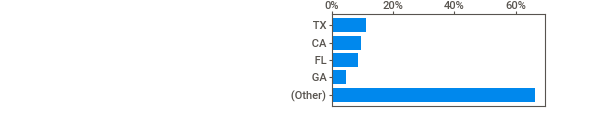
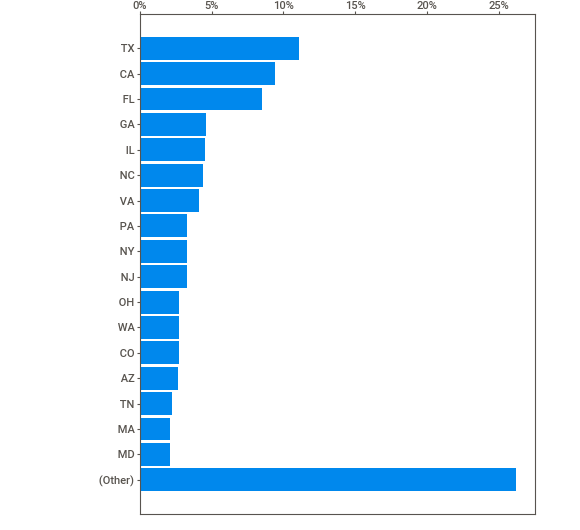
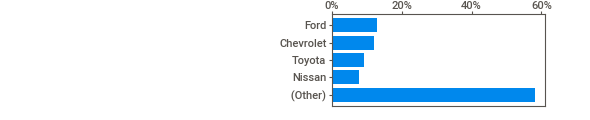
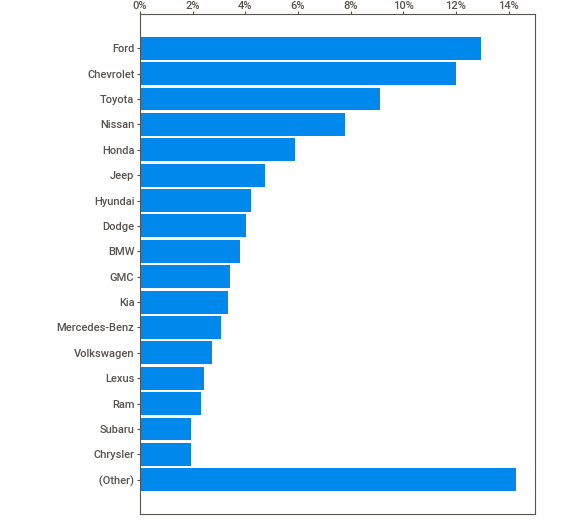
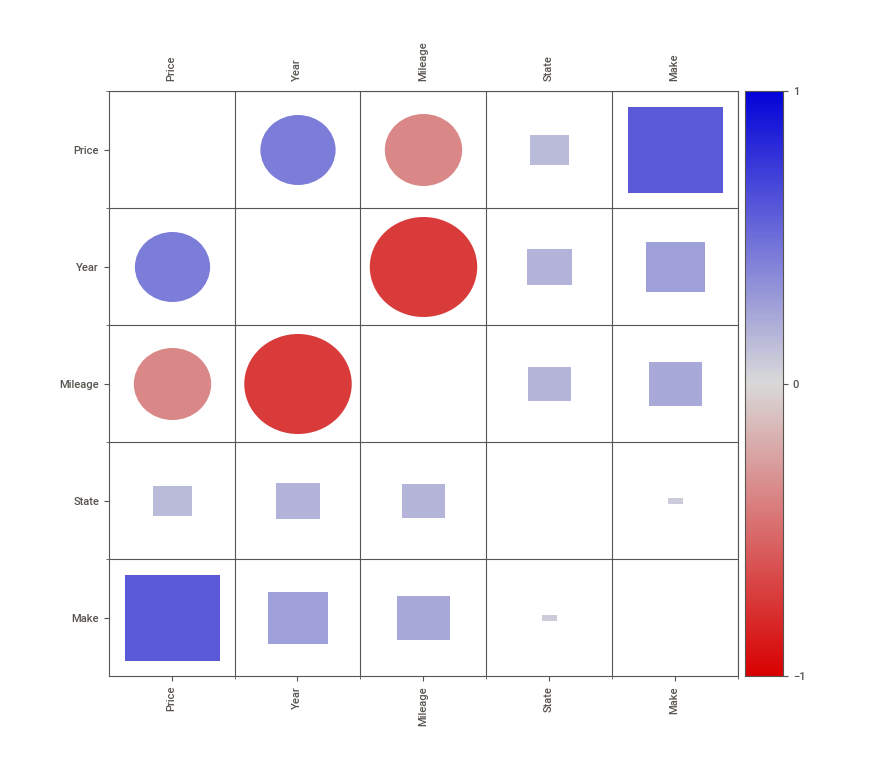
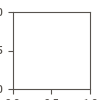

In [ ]:
import IPython
IPython.display.HTML('used_car.html')

#Setup

In [ ]:
#focus on used toyota cars 
df_toyota = df[df.Make == 'Toyota']

features = ['Year', 'Mileage']
X = df_toyota[features]
y = df_toyota.Price

train_size = 0.8
random_state = 1 

#Train Test Split

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=random_state, train_size=train_size) 

#Model

In [ ]:
toyota_model = DecisionTreeRegressor(random_state=random_state)
toyota_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

#Predictions

In [ ]:
val_preds = toyota_model.predict(val_X)

#Validation

In [ ]:
val_mae = mean_absolute_error(val_y, val_preds)
acc = val_preds.sum()/val_y.sum() * 100

print("Validation MAE: {:0f}".format(val_mae))
print("Accuracy : {:0f}".format(acc))

Validation MAE: 7700.794861
Accuracy : 99.567314


#Overcoming Overfit and Underfit

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=random_state)
  model.fit(train_X, train_y)
  preds = model.predict(val_X)
  mae = mean_absolute_error(val_y, preds)
  return(mae) 

In [ ]:
max_leaf_candidate = [5, 10, 50, 90, 100, 200, 500, 1000]
score = {}

for leaf in max_leaf_candidate:
  score[leaf] = get_mae(leaf, train_X, val_X, train_y, val_y)

best_leaf = min(score, key=score.get)

print(score)
print("Lowest Score: {:0f}".format(score[best_leaf]))
print("Best Leaf : {:.0f}".format(best_leaf))

{5: 6161.2580222490615, 10: 6059.043415291235, 50: 5976.700192409672, 90: 5969.072917000858, 100: 5968.867694505022, 200: 5973.772659331514, 500: 6012.555418365782, 1000: 6081.771031908314}
Lowest Score: 5968.867695
Best Leaf : 100


#Full Model Prediction

In [ ]:
final_toyota_model = DecisionTreeRegressor(max_leaf_nodes=best_leaf, random_state=random_state)
final_toyota_model.fit(train_X, train_y)
preds_y = final_toyota_model.predict(val_X)

mae =  mean_absolute_error(val_y, preds_y)
acc = preds_y.sum()/val_y.sum() * 100
print("Mean Absolute Error : {:0f}".format(mae))
print("Accuracy : {:0f}".format(acc))

Mean Absolute Error : 5968.867695
Accuracy : 99.540387


#Save ouput

In [ ]:
output = pd.DataFrame({'Actual' : val_y,
                       'Predicted' : preds_y})
output.to_csv('carprice_output.csv', index=False)

#Used car price predictor

In [ ]:
print("Enter year the car was sold")
year_in = input()
print("Enter the current mileage of the car")
mil_in = input()

test = {'Year' : [year_in], 'Mileage' : [mil_in]}
test_data = pd.DataFrame.from_dict(test)
car_predicted_value = final_toyota_model.predict(test_data)

print("Predicted Toyota car price: RM {:.2f}".format(car_predicted_value[0]))

Enter year the car was sold
2015
Enter the current mileage of the car
90300
Predicted Toyota car price: RM 19220.26


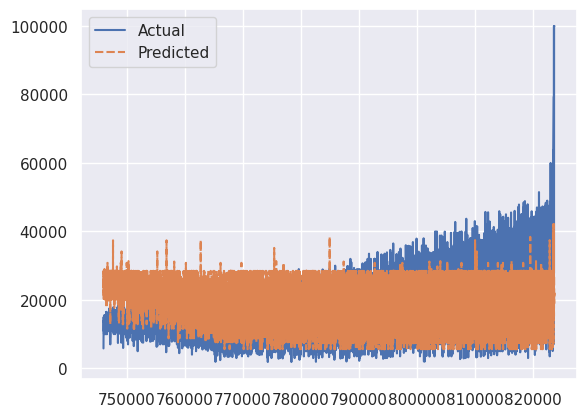

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(data=output)